<h1 align="center">Fake Currency Detection</h1>     

# Introduction
Fake Currency Detection is a real problem for both individuals and businesses. Counterfeiters are constantly finding new methods and techniques to produce counterfeit banknotes, which are essentially indistinguishable from real money. At least for the human eye. In this article, I will introduce you to Fake Currency Detection with Machine Learning.

Fake Currency Detection is a task of binary classification in machine learning. If we have enough data on real and fake banknotes, we can use that data to train a model that can classify the new banknotes as real or fake.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

Now, let’s have a look at the dataset, the data does not have headings so I will also assign headings in the process and then I will print the first 5 rows from the data:

In [2]:
#importing dataset
data = pd.read_csv("C:/Users/kolis/Downloads/bank_notes.csv", header= None)
data.head(10)

,0,1,2,3,4
0,variance,skewness,curtosis,entropy,Target
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0
5,0.32924,-4.4552,4.5718,-0.9888,0
6,4.3684,9.6718,-3.9606,-3.1625,0
7,3.5912,3.0129,0.72888,0.56421,0
8,2.0922,-6.81,8.4636,-0.60216,0
9,3.2032,5.7588,-0.75345,-0.61251,0


In [3]:
data.columns= ['var','skew', 'curt', 'entr', 'auth']

In [4]:
print(data.head(10))

        var      skew      curt      entr    auth
0  variance  skewness  curtosis   entropy  Target
1    3.6216    8.6661   -2.8073  -0.44699       0
2    4.5459    8.1674   -2.4586   -1.4621       0
3     3.866   -2.6383    1.9242   0.10645       0
4    3.4566    9.5228   -4.0112   -3.5944       0
5   0.32924   -4.4552    4.5718   -0.9888       0
6    4.3684    9.6718   -3.9606   -3.1625       0
7    3.5912    3.0129   0.72888   0.56421       0
8    2.0922     -6.81    8.4636  -0.60216       0
9    3.2032    5.7588  -0.75345  -0.61251       0


In [5]:
data.tail()

,var,skew,curt,entr,auth
1368,0.40614,1.3492,-1.4501,-0.55949,1
1369,-1.3887,-4.8773,6.4774,0.34179,1
1370,-3.7503,-13.4586,17.5932,-2.7771,1
1371,-3.5637,-8.3827,12.393,-1.2823,1
1372,-2.5419,-0.65804,2.6842,1.1952,1


In [6]:
data.shape

(1373, 5)

# Data Exploration
Now let’s start exploring the dataset. First, I’ll check the data types and if there are any missing values in the data:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   var     1373 non-null   object
 1   skew    1373 non-null   object
 2   curt    1373 non-null   object
 3   entr    1373 non-null   object
 4   auth    1373 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB


We, therefore, have no missing values in the data.

In [8]:
data.describe()

,var,skew,curt,entr,auth
count,1373,1373,1373,1373,1373
unique,1339,1257,1271,1157,3
top,0.5706,-4.4552,4.5718,-0.9888,0
freq,5,6,5,5,762


In [9]:
data= data.iloc[1: , : ]

In [10]:
data.isnull().sum()

var     0
skew    0
curt    0
entr    0
auth    0
dtype: int64

As we can  see there is no null value in our dataset

In [11]:
print(data)

          var      skew     curt      entr auth
1      3.6216    8.6661  -2.8073  -0.44699    0
2      4.5459    8.1674  -2.4586   -1.4621    0
3       3.866   -2.6383   1.9242   0.10645    0
4      3.4566    9.5228  -4.0112   -3.5944    0
5     0.32924   -4.4552   4.5718   -0.9888    0
...       ...       ...      ...       ...  ...
1368  0.40614    1.3492  -1.4501  -0.55949    1
1369  -1.3887   -4.8773   6.4774   0.34179    1
1370  -3.7503  -13.4586  17.5932   -2.7771    1
1371  -3.5637   -8.3827   12.393   -1.2823    1
1372  -2.5419  -0.65804   2.6842    1.1952    1

[1372 rows x 5 columns]


Let’s plot a pie chart that shows the ratio of fake and original currency notes in the dataset. Execute the following script.

<AxesSubplot:ylabel='auth'>

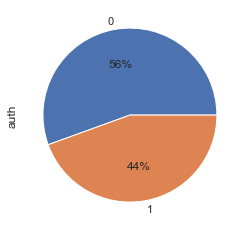

In [12]:
sns.set_theme(style="ticks")

data['auth'].value_counts().plot(kind='pie', autopct='%1.0f%%')

The above pie chart shows that 56% of the currency notes are genuine while the rest of 44% of currency notes are fake.

Now let’s check if our data is balanced against the target values:

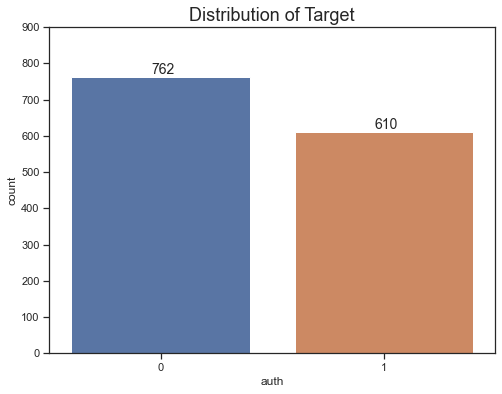

In [13]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Target', size= 18)
sns.countplot(x=data['auth'])
target_count = data.auth.value_counts()
plt.annotate(s = target_count[0], xy= (-0.04, 10+target_count[0]), size=14)
plt.annotate(s= target_count[1], xy = (0.96, 10+target_count[1]), size=14)
plt.ylim(0, 900)
plt.show()

The dataset is fairly balanced, but for the binary classification task, we need to balance it perfectly. So let’s start preprocessing the data by doing just that.

# Data Processing
Now we need to balance our data, the easiest way to do this is to randomly drop a number of instances of the overrepresented target function. This is called random undersampling.

Otherwise, we could also create new synthetic data for the under-represented target class. This is called oversampling. For now, let’s start by randomly deleting 152 observations of actual banknotes:



In [14]:
# balance our data
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [15]:
#divide data into features and label set
x = data.loc[ : , data.columns != 'auth']
y = data.loc[ : , data.columns == 'auth']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.035, random_state=42)

Now I will standardize the data by using the **StandardScalar** method provided by **Scikit-learn** :

In [16]:
#applying scaling on training and test data
scaler = StandardScaler() 
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression for Fake Currency Detection
Now, I will train and test our model for fake currency detection by using the Logistic Regressing Algorithm. Let’s first fit the data on the Logistic Regression model to train the model:

In [17]:
#training the logistic regression model
clf = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

Now let’s test the accuracy of our model:

In [18]:
#making predicions on test set
y_pred = np.array(clf.predict(x_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=['Pred.Negetive', 'Pred.Positive'],
                       index= ['Act.Negetive', 'Act.Positive'])
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4)
print(conf_mat)
print(f'/n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negetive  Pred.Positive
Act.Negetive             23              1
Act.Positive              0             19
/n Accuracy = 97.67%


The logistic regression model achieved an accuracy of 97.67%. And not only that, when our fake currency detection model predicted that a banknote was real, it was correct 100% of the time.

Now let’s simulate the prediction of a single banknote. All we need to do is extract the features, scale them, and integrate them into our pre-trained model. We can also inspect the banknote probabilities of belonging to each target class:

In [19]:
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin = 2)
new_banknote = scaler.transform(new_banknote)
print(f'Prediction : Class {clf.predict(new_banknote)[0]}')
print(f'Probability [0/1] : {clf.predict_proba(new_banknote)[0]}')

Prediction : Class 0
Probability [0/1] : [0.68683186 0.31316814]


The output above shows that our model performance is 97.67% which means that our probability of our machine learning model for correctly predicting whether or not a bank is not fake is 97.67%. Impressive? No?

# Making Prediction on a Single Bank Note
Let’s now see how you can make predictions on a single banknote instead of a complete test set. To make a prediction on an individual banknote, you need values for variance, skewness, kurtosis, and entropy of the image of the banknote. Let’s print the feature values for the 50th banknote in the dataset.



In [20]:
data.iloc[50]

var      3.9414
skew    -3.2902
curt     3.1674
entr     1.0866
auth          0
Name: 450, dtype: object

From the above output, we know that this banknote is not fake since the value of the class attribute is 0.

To find the label for the 50th note in the dataset using the trained machine learning model, you need to pass the information of the 50th note in the dataset to a standard scaler which scales your feature set. Next, you need to pass the scaled dataset to the predict() method of the model that you already trained. Look at the following script for reference.

In [21]:
single_record = scaler.transform(x.values[50].reshape(1, -1))

#making Predictions on the single record
fake_note = clf.predict(single_record)
print(fake_note)

['0']


The above output shows that our banknote is not fake which is the correct output.